## __Selecting A School in Singapore__: 
### *Beyond Grade-based Entry Requirements and Popular "Top" Schools*

By DC LIM

__Introduction__ 

Singapore is a small nation-state in South-east Asia, with a population of about 5 million people. Its education system ranks among the best in the world, where its students consistently come in among the top few worldwide in PISA scores. A good education is highly prized for it brings promise of a stable, high-paying job in the future. Hence, a place in the popular "top" schools is highly sought after, right down to primary (elementary) school. Good foundations pave the way for good test scores for entry into the best schools in the next level of the education system, so goes the general thinking. 

Practically every Singaporean parent with school-going children knows the game. The popular "top" schools are household names too. Some schools are also known for being the best at certain sports or competitive games. Based on performance in preliminary exams sat for in the final year of elementary and high school, each student roughly knows what "tier" of schools he/she can enter in the next level of the system. Grades are make or break, literally. 

However, basing a major decision on just 1 factor is a little shoddy and boring, isn't it? What about life outside school? Where can a student hang out with friends or go on a date after school? What are the lunch options available? For the tiger moms/dads out there - are there entertainment options aplenty nearby that might distract their children from going straight home for yet more study and revision?

For this project, I will put aside test scores and "top schools", and explore the neighbourhoods of schools in Singapore to identify various groups of schools that might cater to different profiles of students and their parents.

__Data__

Data on Singapore schools can be obtained from data.gov.sg, a publicly-accessible database maintained by the Singapore government that contains datasets on different aspects of the country.

The dataset relevant to this project can be downloaded as a csv file from the School Directory and Information page on the website, link below. The dataset contains the names of schools in Singapore and basic information for each such as address (including postal code), phone number, level (e.g. primary/secondary school) and so on.

Postal codes are essential for the purposes of this project, since they will be geocoded to obtain the latitude and longitude of each school. This will allow us to tap on Foursquare's database to obtain the nearby venues for analysis and subsequent clustering using the K-means clustering machine learning technique.

We import the relevant Python libraries needed for this project as below, and ingest the dataset for exploration and analysis.

https://data.gov.sg/dataset/school-directory-and-information

In [8]:
#import libraries required for this project
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

import requests
import folium
from IPython.display import Image 
from IPython.core.display import HTML 

schools_df = pd.read_csv("Singapore schools and postal codes.csv")

address = 'Singapore, SG'

geolocator = Nominatim(user_agent="sg_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

schools_df.head()

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,session_code,mainlevel_code,sap_ind,autonomous_ind,gifted_ind,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code,special_sdp_offered
0,ADMIRALTY PRIMARY SCHOOL,http://www.admiraltypri.moe.edu.sg/,11 WOODLANDS CIRCLE,738907,63620598,na,63627512,na,ADMIRALTY_PS@MOE.EDU.SG,Admiralty Station,...,FULL DAY,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,"With globalization, it is important for our st..."
1,ADMIRALTY SECONDARY SCHOOL,http://www.admiraltysec.moe.edu.sg,31 WOODLANDS CRESCENT,737916,63651733,63654596,63652774,na,Admiralty_SS@moe.edu.sg,ADMIRALTY MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,Design Thinking is used as an anchor pedagogic...
2,AHMAD IBRAHIM PRIMARY SCHOOL,http://www.ahmadibrahimpri.moe.edu.sg,10 YISHUN STREET 11,768643,67592906,na,67592927,na,aips@moe.edu.sg,Yishun,...,SINGLE SESSION,PRIMARY,No,No,No,No,Chinese,Malay,Tamil,The 3Rs - Leader U Development programme- From...
3,AHMAD IBRAHIM SECONDARY SCHOOL,http://www.ahmadibrahimsec.moe.edu.sg,751 YISHUN AVENUE 7,768928,67585384,na,67557778,na,aiss@moe.edu.sg,YISHUN MRT,...,SINGLE SESSION,SECONDARY,No,No,No,No,Chinese,Malay,Tamil,1. Character Development through Outdoor Learn...
4,AI TONG SCHOOL,http://www.aitong.moe.edu.sg,100 Bright Hill Drive,579646,64547672,na,64532726,na,AITONG_SCH@MOE.EDU.SG,Bishan MRT,...,SINGLE SESSION,PRIMARY,Yes,No,No,No,Chinese,na,na,"As a Special Assistance Plan (SAP) school, Ai ..."


In [9]:
import geopy
from geopy.extra.rate_limiter import RateLimiter

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

schools_df['location'] = schools_df['postal_code'].apply(geocode)

schools_df['point'] = schools_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# split point column into latitude, longitude and altitude columns
schools_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(schools_df['point'].tolist(), index=schools_df.index)

#Drop the empty altitude column and remove rows with NA data under lat and long
schools_df.drop("altitude", axis=1)
schools_df.dropna(subset=["latitude"], axis=0, inplace=True)
schools_df.dropna(subset=["longitude"], axis=0, inplace=True)
schools_df.reset_index(drop=True)

,school_name,url_address,address,postal_code,telephone_no,telephone_no_2,fax_no,fax_no_2,email_address,mrt_desc,...,ip_ind,mothertongue1_code,mothertongue2_code,mothertongue3_code,special_sdp_offered,location,point,latitude,longitude,altitude
0,ADMIRALTY PRIMARY SCHOOL,http://www.admiraltypri.moe.edu.sg/,11 WOODLANDS CIRCLE,738907,63620598,na,63627512,na,ADMIRALTY_PS@MOE.EDU.SG,Admiralty Station,...,No,Chinese,Malay,Tamil,"With globalization, it is important for our st...","(Northwest, 738907, Singapore, (1.443015124145...","(1.4430151241456437, 103.80028198430566, 0.0)",1.443015,103.800282,0.0
1,ADMIRALTY SECONDARY SCHOOL,http://www.admiraltysec.moe.edu.sg,31 WOODLANDS CRESCENT,737916,63651733,63654596,63652774,na,Admiralty_SS@moe.edu.sg,ADMIRALTY MRT,...,No,Chinese,Malay,Tamil,Design Thinking is used as an anchor pedagogic...,"(Northwest, 737916, Singapore, (1.445960168499...","(1.4459601684991499, 103.80278481638744, 0.0)",1.445960,103.802785,0.0
2,AHMAD IBRAHIM PRIMARY SCHOOL,http://www.ahmadibrahimpri.moe.edu.sg,10 YISHUN STREET 11,768643,67592906,na,67592927,na,aips@moe.edu.sg,Yishun,...,No,Chinese,Malay,Tamil,The 3Rs - Leader U Development programme- From...,"(Northwest, 768643, Singapore, (1.433726765419...","(1.4337267654190344, 103.83274871474491, 0.0)",1.433727,103.832749,0.0
3,AHMAD IBRAHIM SECONDARY SCHOOL,http://www.ahmadibrahimsec.moe.edu.sg,751 YISHUN AVENUE 7,768928,67585384,na,67557778,na,aiss@moe.edu.sg,YISHUN MRT,...,No,Chinese,Malay,Tamil,1. Character Development through Outdoor Learn...,"(Lhotky, Kramolna, okres Náchod, Královéhradec...","(50.42251735, 16.116112899555517, 0.0)",50.422517,16.116113,0.0
4,AI TONG SCHOOL,http://www.aitong.moe.edu.sg,100 Bright Hill Drive,579646,64547672,na,64532726,na,AITONG_SCH@MOE.EDU.SG,Bishan MRT,...,No,Chinese,na,na,"As a Special Assistance Plan (SAP) school, Ai ...","(Central, 579646, Singapore, (1.36061808472064...","(1.3606180847206468, 103.83295304708206, 0.0)",1.360618,103.832953,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,ZHANGDE PRIMARY SCHOOL,http://www.zhangdepri.moe.edu.sg/,51 Jalan Membina,169485,62740357,na,62763042,na,ZHANGDE_PS@MOE.EDU.SG,Tiong Bahru MRT Station,...,No,Chinese,Malay,Tamil,The school believes in the holistic developmen...,"(Central, 169485, Singapore, (1.28426555755167...","(1.2842655575516795, 103.82606254103202, 0.0)",1.284266,103.826063,0.0
323,ZHENGHUA PRIMARY SCHOOL,http://www.zhenghuapri.moe.edu.sg,9 Fajar Road,679002,67697478,na,67636459,na,zhenghua_ps@moe.edu.sg,LRT: Fajar Station,...,No,Chinese,Malay,Tamil,Character Education takes centre stage in the ...,"(Northwest, 679002, Singapore, (1.379710980147...","(1.379710980147195, 103.76945499617278, 0.0)",1.379711,103.769455,0.0
324,ZHENGHUA SECONDARY SCHOOL,http://www.zhenghuasec.moe.edu.sg,91 SENJA ROAD,677741,67639455,na,67633577,na,ZHENGHUA_SS@MOE.EDU.SG,JELAPANG LRT,...,No,Chinese,Malay,Tamil,Learning for Life Programme (Outdoor Education...,"(Bukit Panjang, Northwest, 677741, Singapore, ...","(1.3889874252535928, 103.76527683024429, 0.0)",1.388987,103.765277,0.0
325,ZHONGHUA PRIMARY SCHOOL,http://www.zhonghuapri.moe.edu.sg,12 SERANGOON AVENUE 4,556095,62835413,na,62823882,na,zhonghua_ps@moe.edu.sg,"Ang Mo Kio MRT, Bishan MRT, Serangoon MRT",...,No,Chinese,Malay,Tamil,The school's Lifelong Learning Programme (LLP)...,"(Southeast, 556095, Singapore, (1.360219205698...","(1.3602192056982683, 103.86985484258189, 0.0)",1.360219,103.869855,0.0


We create a map of Singapore with the schools indicated by markers

In [10]:
map_sgschools = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, school in zip(schools_df['latitude'], schools_df['longitude'], schools_df['school_name']):
    label = folium.Popup(school, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sgschools)  
    
map_sgschools

As seen from the above, schools are pretty much present in all parts of Singapore except the water bodies (reservoirs), since land is limited on the island.

Next, we explore the neighbourhoods within 1 km radius around the schools by using Foursquare to obtain data of nearby venues.


In [11]:
#Create a function to obtain Foursquare venue data.

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

CLIENT_ID =  # your Foursquare ID
CLIENT_SECRET = # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

venues_nearschools = getNearbyVenues(names=schools_df['school_name'],
                                   latitudes=schools_df['latitude'],
                                   longitudes=schools_df['longitude']
                                  )

In [12]:
#Remove similar venues leaving just 1 of them

venues_nearschools["Venue Category"].replace("Zhejiang Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("South Indian Restaurant", "Indian Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Cantonese Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Metro Station", "Train Station", inplace=True)
venues_nearschools["Venue Category"].replace("Sushi Restaurant", "Japanese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Szechuan Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Shanghai Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Shaanxi Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hotel Bar", "Hotel", inplace=True)
venues_nearschools["Venue Category"].replace("Hong Kong Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hakka Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Hainan Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Gym Pool", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Gym / Fitness Center", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Garden Center", "Gym", inplace=True)
venues_nearschools["Venue Category"].replace("Airport Terminal", "Airport", inplace=True)
venues_nearschools["Venue Category"].replace("Auto Garage", "Auto Workshop", inplace=True)
venues_nearschools["Venue Category"].replace("Automotive Shop", "Auto Workshop", inplace=True)
venues_nearschools["Venue Category"].replace("Basketball Stadium", "Basketball Court", inplace=True)
venues_nearschools["Venue Category"].replace("Beer Bar", "Beer Garden", inplace=True)
venues_nearschools["Venue Category"].replace("Bowling Green", "Bowling Alley", inplace=True)
venues_nearschools["Venue Category"].replace("Bus Line", "Bus Stop", inplace=True)
venues_nearschools["Venue Category"].replace("Cha Chaan Teng", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Chinese Aristocrat Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Chinese Breakfast Place", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Dim Sum Restaurant", "Chinese Restaurant", inplace=True)
venues_nearschools["Venue Category"].replace("Fujian Restaurant", "Chinese Restaurant", inplace=True)


#Remove venue names that do not contain useful information
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Building"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Comfort Food Restaurant"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Food"]
venues_nearschools = venues_nearschools[venues_nearschools["Venue Category"] != "Other Great Outdoors"]

# one hot encoding
sgschools_onehot = pd.get_dummies(venues_nearschools[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sgschools_onehot['Neighbourhood'] = venues_nearschools['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [sgschools_onehot.columns[-1]] + list(sgschools_onehot.columns[:-1])
sg_df = sgschools_onehot[fixed_columns]

# group rows by neighbourhood and take the mean of the frequency of occurrence of each category
sg_grouped = sg_df.groupby('Neighbourhood').mean().reset_index()

# write a function to sort venues in the dataset in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['school_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['school_name'] = sg_grouped['Neighbourhood']

for ind in np.arange(sg_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sg_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,school_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ADMIRALTY PRIMARY SCHOOL,Food Court,Bus Station,Supermarket,Park,Coffee Shop,Fast Food Restaurant,Basketball Court,Spa,Shopping Mall,Malay Restaurant
1,ADMIRALTY SECONDARY SCHOOL,Park,Food Court,Coffee Shop,Supermarket,Basketball Court,BBQ Joint,Spa,Fast Food Restaurant,Steakhouse,Chinese Restaurant
2,AHMAD IBRAHIM PRIMARY SCHOOL,Chinese Restaurant,Coffee Shop,Food Court,Fried Chicken Joint,Indian Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,Bubble Tea Shop,Café
3,AHMAD IBRAHIM SECONDARY SCHOOL,Bar,Airport,Tennis Court,Zoo Exhibit,Fish & Chips Shop,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fishing Spot
4,AI TONG SCHOOL,Chinese Restaurant,Thai Restaurant,Japanese Restaurant,Café,Ice Cream Shop,Coffee Shop,Nature Preserve,Karaoke Bar,Seafood Restaurant,Tea Room


Initialise K-means modelling and find the optimal K value using the elbow method

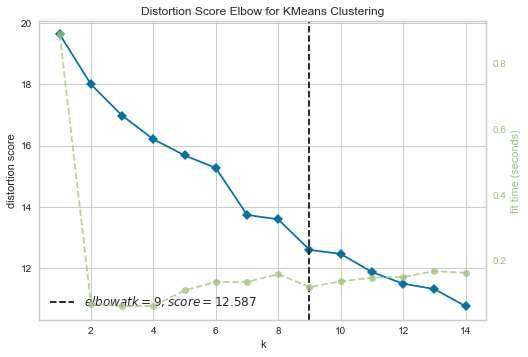

In [18]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

school_cluster = sg_grouped.drop('Neighbourhood', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))

visualizer.fit(school_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



In [19]:
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(school_cluster)

# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

school_df2 = schools_df[["school_name", "latitude", "longitude"]]
school_df2.head()

# merge tr_merged with the neighbourhoods_venues_sorted dataset to get cluster label and top 10 venues for each neighbourhood
schools_merged = school_df2.join(neighbourhoods_venues_sorted.set_index('school_name'), on='school_name')

#Drop na values from the Cluster_Labels column
schools_merged.dropna(subset=["Cluster_Labels"], axis=0, inplace=True)
schools_merged.reset_index(drop=True)

#Convert the Cluster Labels from float to integer for plotting
schools_merged["Cluster_Labels"] = schools_merged["Cluster_Labels"].astype(int)

schools_merged.sort_values(by=['Cluster_Labels'], inplace=True) 
schools_merged

ValueError: cannot insert Cluster_Labels, already exists

__Results__

We create a map to visualise the resulting clusters

In [20]:
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(schools_merged['latitude'], schools_merged['longitude'], schools_merged['school_name'], 
                                  schools_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [21]:
schools_merged["Cluster_Labels"].value_counts()

9    77
1    63
7    53
4    46
0    46
2    22
8     2
6     1
5     1
3     1
Name: Cluster_Labels, dtype: int64

We see that the most significant clusters are clusters 2, 6, 0, 1 and 4 in descending order of size. Clusters 8, 7, 5 and 3 are much smaller in size. For the purposes of our analysis, let us focus on the first group of clusters since it will offer more choices for our potential users within each cluster.
We examine each cluster in turn to understand the profile of the neighbourhood around the schools. We also create a new map with the 5 top clusters that allows for easy visualisation where readers can select the cluster(s) they want to see depending on their preferences.

In [24]:
#Subset dataset to get only data in the top 5 clusters

schools_merged2 = schools_merged[schools_merged.Cluster_Labels.isin([2, 6, 0, 1, 4])]

new_map = folium.Map(location=[latitude, longitude], zoom_start=11)

from branca.colormap import linear
from folium import FeatureGroup, LayerControl, Map, Marker

for grp_name, df_grp in schools_merged2.groupby('Cluster_Labels'):
    feature_group = folium.FeatureGroup(grp_name)
    for row in df_grp.itertuples():
        folium.CircleMarker(location=[row.latitude, row.longitude], radius = 5, fill = True, fill_opacity=0.7,
                            popup = folium.Popup(row.school_name + ' Cluster ' + str(row.Cluster_Labels), parse_html=True), 
                            fill_color=rainbow[grp_name-1], color=rainbow[grp_name-1]).add_to(feature_group)
    feature_group.add_to(new_map)

folium.LayerControl().add_to(new_map)    

new_map

__Discussion__

*Observations based on the clusters generated from Kmeans modelling and visualisation of the cluster locations*

__What type of "users" would prefer each cluster profile?__

Parents may prefer to send their children to a school in either Cluster 6 or 4 if they want their children to have a quick meal after school before heading home. There are not many recreational options that may pose distractions. These may be for families where both parents have full-time day jobs, and are unable to pick up their kids immediately after school.

Parents may prefer to send their children to a school in Cluster 0 if they are keen to have their children adopt a healthy lifestyle that can make use of the amenities that tend to be close by, such as Pool, Soccer Stadium etc.

Students may choose to enroll in a school in either Cluster 2, 6 or 1 if they want access to a wider variety of recreational and entertainment options after school where they can hang out with friends.

__Conclusion__

In conclusion, we can see that the neighbourhoods around schools in Singapore can be clusterd into 5 big and distinct groups, each with their own profile based on the most common venue types found in them. The study can provide further information for both students and parents alike in selecting schools based on the type of neighbourhoods they are in, in addition to the usual grade-based entry requirements, popular brand names, sporting excellence and so on.